from google.colab import files
uploaded = files.upload()



In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Output_HEFT_2.csv to Output_HEFT_2.csv


In [3]:
# Load datasets from 'datasets/' folder
task_vm_df = pd.read_csv("datasets/task_vm.csv")
vm_df = pd.read_csv("datasets/vm_parameters.csv")

# Merge VM parameters
merged_df = task_vm_df.merge(vm_df, on="VM_ID", how="left")

# Optional: Feature engineering
merged_df["TaskMI_per_MIPS"] = merged_df["TaskMI"] / merged_df["MIPs"]

In [4]:
print(merged_df.columns)

Index(['Ref_No_x', 'Job_ID', 'Task_ID', 'TaskMI', 'TaskSize', 'DataCenter_ID',
       'VM_ID', 'Job_Depth', 'Actual_CPU_Time', 'Start_Time', 'Finish_Time',
       'Ref_No_y', 'ImgSize', 'VM_Memory', 'MIPs', 'Bandwidth', 'PES',
       'TaskMI_per_MIPS'],
      dtype='object')


In [5]:
merged_df = merged_df.sample(n=40000, random_state=42)

In [6]:
# Feature columns to use
features = [
    "TaskMI", "TaskSize", "Job_Depth", "MIPs",
    "Bandwidth", "VM_Memory", "PES", "TaskMI_per_MIPS"
]

# Target variable
merged_df["Execution_Time"] = merged_df["Finish_Time"] - merged_df["Start_Time"]

X = merged_df[features]
y = merged_df["Execution_Time"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 237673.19460700758
R² Score: 0.9616447323443706


In [10]:
# Example: predict for first 5 test samples
predicted_times = model.predict(X_test[:5])
print(predicted_times)


[1.16568672 1.43806053 8.94049651 3.98166944 1.13823628]


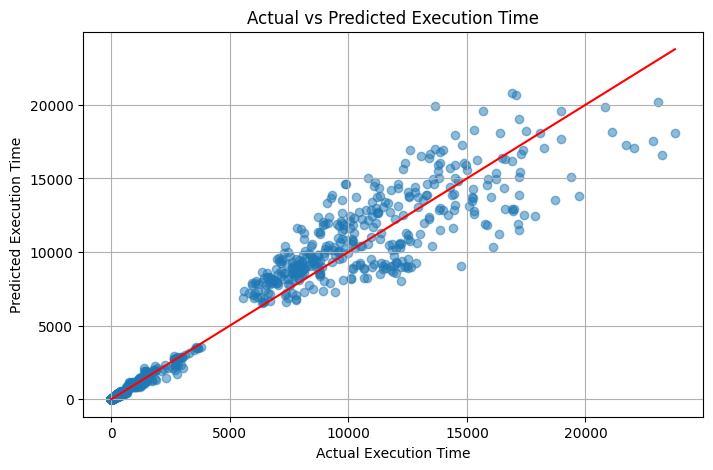

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Execution Time")
plt.ylabel("Predicted Execution Time")
plt.title("Actual vs Predicted Execution Time")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()


In [12]:
import joblib
joblib.dump(model, 'execution_time_predictor.pkl')


['execution_time_predictor.pkl']

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📏 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🧠 R² Score: {r2:.4f}")


📉 Mean Squared Error (MSE): 237673.19
📏 Root Mean Squared Error (RMSE): 487.52
📊 Mean Absolute Error (MAE): 96.40
🧠 R² Score: 0.9616
